
Model of "A 7-nm Compute-in-Memory SRAM Macro Supporting Multi-Bit Input, Weight
and Output and Achieving 351 TOPS/W and 372.4 GOPS", JSSC 2021
--------------------------------------------------------------------------------

Paper by Mahmut E. Sinangil, Burak Erbagci, Rawan Naous, Kerem Akarvardar, Dar
Sun, Win-San Khwa, Hung-Jen Liao, Yih Wang, and Jonathan Chang

## Description of The Macro

The macro uses a 64x64 SRAM array with every four columns connected by an analog
adder. This way, four side-by-side SRAM devices can store and compute with a
4b weight. A 4b DAC provides 4b inputs, and a 4b ADC
reads outputs from the array.

Some of the important variables for sinangil_jssc_2021:

- *ARRAY_WORDLINES*: 64 rows in the array
- *ARRAY_BITLINES*: 64 columns in the array
- *ARRAY_PARALLEL_INPUTS*: 64 input slice(s) consumed in each cycle.
- *ARRAY_PARALLEL_WEIGHTS*: 1024 weights slice(s) used for computation in each cycle.
- *ARRAY_PARALLEL_OUTPUTS*: 16 output(s) produced in each cycle.
- *TECHNOLOGY*: 7 nm
- *ADC_RESOLUTION*: 4 bit(s)
- *DAC_RESOLUTION*: 4 bit(s)
- *N_ADC_PER_BANK*: 16 ADC(s)
- *SUPPORTED_INPUT_BITS*: 4 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 4 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 4 bit(s)
- *BITS_PER_CELL*: 1 bit(s)
- *CIM_UNIT_WIDTH_CELLS*: 4 adjacent cell(s) in a wordline store bit(s) in one weight slice and process one input & output slice together
- *CIM_UNIT_DEPTH_CELLS*: 1 adjacent cell(s) in a bitline operate in separate cycles
- *CELL_CONFIG*: None 
- *GLOBAL_CYCLE_SECONDS*: 5.5e-09 clock period

### Macro Level

- *Input Path*: 4b are encoded in the analog domain as a number of pulses
  from 0 to 15. To encode this input, a counter is used to count up to the input
  value generate the necessary number of pulses. Each row of the array is
  connected to a different counter. After passing through the counter, inputs
  (as pulse trains) pass through the row drivers.
- *Weight Path*: Weight drivers are used to rewrite weights in the array.
- *Output Path*: Column drivers read analog outputs from the array, after which
  outputs are passed through a 4b flash ADC to convert them to digital.
  There are 16 ADCs, one for each parallel output produced by the array.

Next, there are 16 columns in each macro. Inputs are spatially reused between
columns (*i.e,* each row wire connects to all columns), and each column
processes separate outputs and weights.

### Column Level

- *Input Path*: Each input is passed directly to a row in the column.
- *Weight Path*: A column bandwidth limiter sets the read and write bandwidth of
  each array column. Each weight is then passed to a row in the column.
- *Output Path*: Each column is composed of four wordlines that contain MAC
  results from four bits of weights. The outputs of these wordlines are weighted
  and summed with binary weighting capacitors. A column bandwidth limiter sets
  the read and write bandwidth of each array column.
  
Next, there are 16 rows in each column. Outputs are spatially reused between
rows (*i.e.,* accumulated on wires between rows), while each row processes
separate inputs and weights.

### Row Level

Inside each row, a cim_unit computes MAC operations.

- *Input Path*: A 4b input is provided to the cim_unit from the DAC.
- *Weight Path*: The cim_unit is composed of four SRAM devices that store a
  4b weight.
- *Output Path*: Each cim_unit produces a 4b output.

Inside the CiM unit, 4x4x4 (4b input x 4b weight x 4b output)
virtualized MAC units compute the MAC operation.


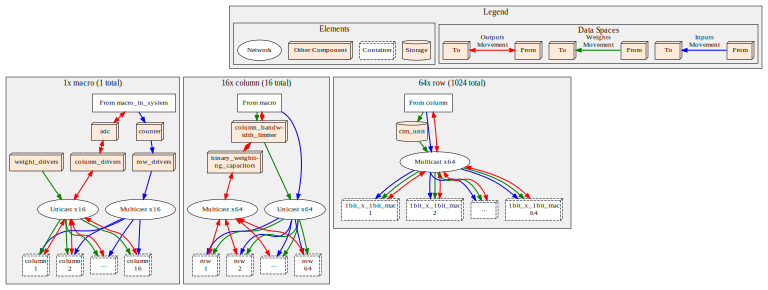

In [1]:
from _tests import scripts
from scripts.notebook_utils import *

display_markdown(
    f"""
Model of "A 7-nm Compute-in-Memory SRAM Macro Supporting Multi-Bit Input, Weight
and Output and Achieving 351 TOPS/W and 372.4 GOPS", JSSC 2021
--------------------------------------------------------------------------------

Paper by Mahmut E. Sinangil, Burak Erbagci, Rawan Naous, Kerem Akarvardar, Dar
Sun, Win-San Khwa, Hung-Jen Liao, Yih Wang, and Jonathan Chang

## Description of The Macro

The macro uses a 64x64 SRAM array with every four columns connected by an analog
adder. This way, four side-by-side SRAM devices can store and compute with a
4b weight. A 4b DAC provides 4b inputs, and a 4b ADC
reads outputs from the array.

{get_important_variables_markdown('sinangil_jssc_2021')}

### Macro Level

- *Input Path*: 4b are encoded in the analog domain as a number of pulses
  from 0 to 15. To encode this input, a counter is used to count up to the input
  value generate the necessary number of pulses. Each row of the array is
  connected to a different counter. After passing through the counter, inputs
  (as pulse trains) pass through the row drivers.
- *Weight Path*: Weight drivers are used to rewrite weights in the array.
- *Output Path*: Column drivers read analog outputs from the array, after which
  outputs are passed through a 4b flash ADC to convert them to digital.
  There are 16 ADCs, one for each parallel output produced by the array.

Next, there are 16 columns in each macro. Inputs are spatially reused between
columns (*i.e,* each row wire connects to all columns), and each column
processes separate outputs and weights.

### Column Level

- *Input Path*: Each input is passed directly to a row in the column.
- *Weight Path*: A column bandwidth limiter sets the read and write bandwidth of
  each array column. Each weight is then passed to a row in the column.
- *Output Path*: Each column is composed of four wordlines that contain MAC
  results from four bits of weights. The outputs of these wordlines are weighted
  and summed with binary weighting capacitors. A column bandwidth limiter sets
  the read and write bandwidth of each array column.
  
Next, there are 16 rows in each column. Outputs are spatially reused between
rows (*i.e.,* accumulated on wires between rows), while each row processes
separate inputs and weights.

### Row Level

Inside each row, a cim_unit computes MAC operations.

- *Input Path*: A 4b input is provided to the cim_unit from the DAC.
- *Weight Path*: The cim_unit is composed of four SRAM devices that store a
  4b weight.
- *Output Path*: Each cim_unit produces a 4b output.

Inside the CiM unit, 4x4x4 (4b input x 4b weight x 4b output)
virtualized MAC units compute the MAC operation.
"""
)
display_diagram(get_diagram("sinangil_jssc_2021", ignore=DIAGRAM_DEFAULT_IGNORE))


   ### Data-Value-Dependent Energy

   This test replicates the results of Fig. 13(a) of the paper.

   The energy consumed by the macro is data-value-dependent. In this test, we
   will plot the average energy consumed by the macro as the average output
   value increases. We will vary the output value from 0 to 15. For each, we
   set all input and weight values to be the square root of the output value
   divided by a scaling factor. The scaling factor captures the scaling of
   outputs before the ADC and the summation of results from many rows.

   We see that the energy consumed by the macro increases as the average output
   value increases. This is because:

   - As the average input value increases, there is more switching on row wires
     to encode the larger input values, leading to higher energy.
   - Similarly, as the average weight value increases, there is greater
     discharging of summing capacitors on each column, again leading to higher
     energy.
   

100%|██████████| 16/16 [00:12<00:00,  1.25it/s]


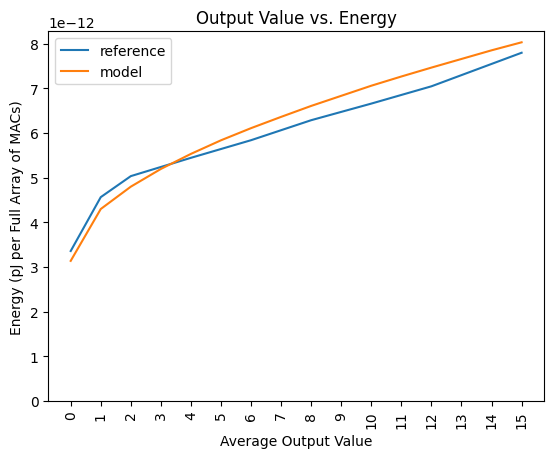

In [2]:
result = run_test("sinangil_jssc_2021", "test_output_value_energy_scaling")

plot(
    {r.variables["AVERAGE_OUTPUT_VALUE"]: r.energy for r in result},
    xlabel="Average Output Value",
    ylabel="Energy (pJ per Full Array of MACs)",
    title="Output Value vs. Energy",
)


   ### Energy Efficiency and Throughput

   This test replicates the results of Table I in the paper. We show the area
   and energy efficiency and throughput of the macro at 0.8V and 1V supply
   voltages and at varying average output values. For output values, we use 0
   (minimum, best-case), 6 (average), and 15 (maximum, worst-case).

   We see that, as the supply voltage increases, the macro gains throughput at
   the cost of decreased energy efficiency. As the average output value
   increases, the energy efficiency also decreases due to the
   data-value-dependent energy consumption of row and column circuitry.

   There is significant variation only for the case with 1V supply voltage and
   average output value of 6. We attribute this to variation in measurements of
   the fabricated chip, as all reference results except for this case follow
   consistent scaling trends with supply voltage and average output value.
   Further tests on the fabricated chip may be required to find the precise
   cause of this difference.
   

100%|██████████| 6/6 [00:14<00:00,  2.39s/it]


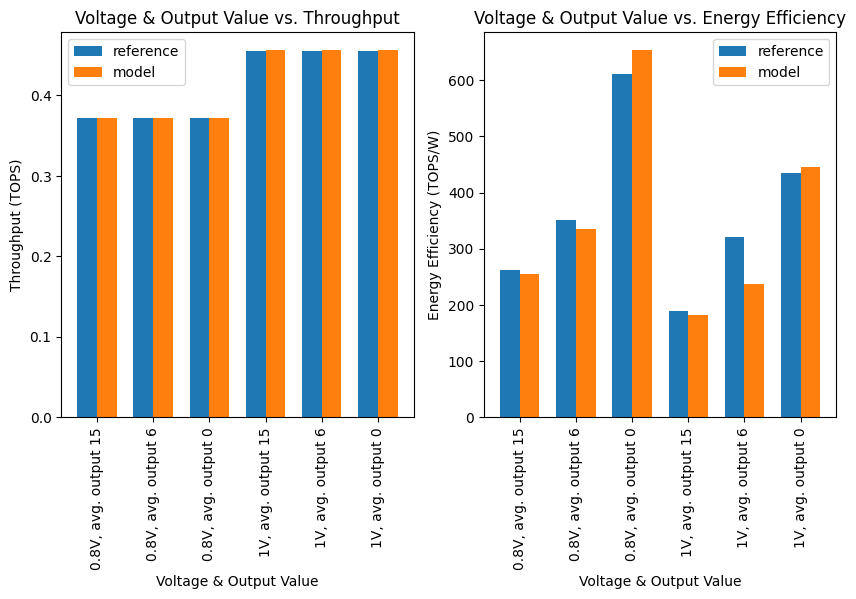

In [3]:
result = run_test("sinangil_jssc_2021", "test_tops")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

organized = {
    f"{r.variables['VOLTAGE']}V, avg. output {r.variables['AVERAGE_OUTPUT_VALUE']}": r
    for r in result
}

bar_side_by_side(
    {k: v.tops for k, v in organized.items()},
    xlabel="Voltage & Output Value",
    ylabel="Throughput (TOPS)",
    title="Voltage & Output Value vs. Throughput",
    ax=ax[0],
)
bar_side_by_side(
    {k: v.tops_per_w for k, v in organized.items()},
    xlabel="Voltage & Output Value",
    ylabel="Energy Efficiency (TOPS/W)",
    title="Voltage & Output Value vs. Energy Efficiency",
    ax=ax[1],
)


   ### Area Breakdown

   This test replicates the results of Section IV paragraph 1 of the paper.

   We show the area of the macro and its subcomponents. We report the area of
   the CIM circuitry, the original macro, and the binary weighting capacitors.

   The CiM circuitry consumes the majority of the area, due to the high area of
   ADC and DAC circuitry.

   

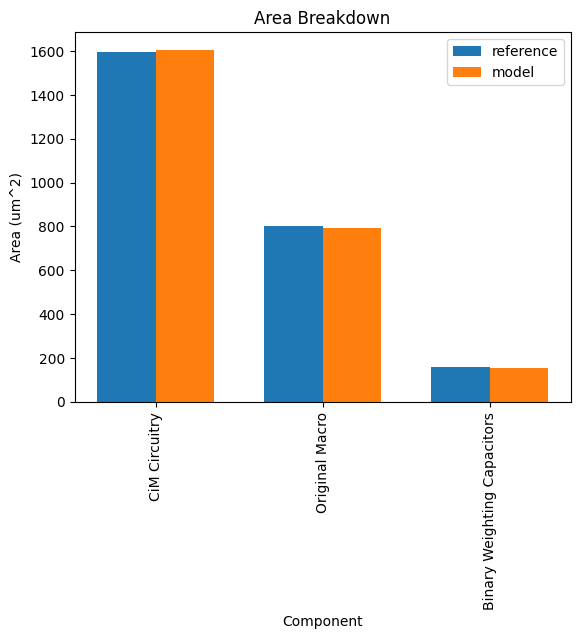

In [4]:
result = run_test("sinangil_jssc_2021", "test_area_breakdown")
bar_side_by_side(
    result[0].get_compare_ref_area()*1e12,
    xlabel="Component",
    ylabel="Area (um^2)",
    title="Area Breakdown",
)


   ### Voltage Scaling

   This test replicates the results of Fig. 13(b) of the paper.

   We show the area and energy of the macro at supply voltages ranging from
   0.65V to 1V, testing the worst-case (inputs, weights, and outputs are all
   maximum values) scenario. We see that the macro's energy consumption
   increases as the supply voltage increases.

   When developing the model, we found that there is a energy scales more
   aggressively with supply voltage in this result (Fig. 13(b) in the paper)
   than in the previous result (Table I). This difference could have been due
   to many factors in the fabricated chip measurement (temperature, input and
   output value distributions, clock frequency, etc.). We chose to set up the
   model to match Table I, leading to a discrepancy in this result.
   

100%|██████████| 8/8 [00:13<00:00,  1.67s/it]


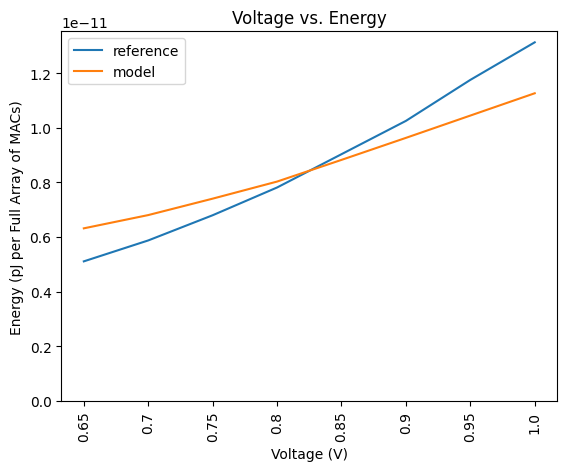

In [5]:
result = run_test("sinangil_jssc_2021", "test_voltage_scaling")
plot(
    {r.variables["VOLTAGE"]: r.energy * 1e12 for r in result},
    xlabel="Voltage (V)",
    ylabel="Energy (pJ per Full Array of MACs)",
    title="Voltage vs. Energy",
)


   ### Exploration of CiM unit width versus number of weight bits

   This test explores the tradeoff between the width of the CiM unit (i.e.,
   number of weight bits that are stored and processed in one slice), the
   number of weight bits in the workload, and the compute density of the macro.

   In this test, we vary the CiM unit width while keeping the array size
   constant (*e.g.,* when we double the CiM unit width, it doubles the bits per
   weight slice but halves the number of columns). We then measure the
   throughput of the macro for different numbers of bits per weight. When
   changing the CiM unit width, the binary weighting capacitors will also be
   scaled to sum results from the bits within a weight slice.

   We see that CiM units with more weight bits can increase compute density for
   a given number of weight bits because they store more bits in each slice,
   require fewer columns to store slices, and require less circuitry (mostly
   ADCs) to read outputs. However, CiM units become underutilized when there
   are fewer bits per weight than they store.

   Wider CiM units also lead to a larger-area chip due to the larger binary
   weighting capacitors required to sum results from the bits within a weight
   slice. The size of the binary weighting capacitors increases exponentially
   with the number of bits per weight. For this reason, the eight-wide CiM unit
   had high area from the binary weighting capacitors, and it never had the
   highest compute density.
   

100%|██████████| 32/32 [00:22<00:00,  1.40it/s]


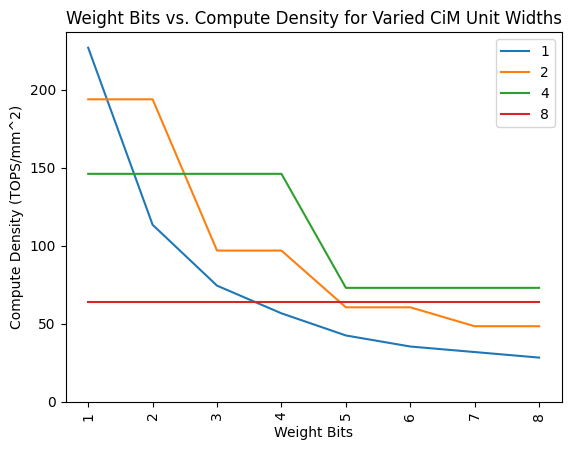

In [6]:
result = run_test("sinangil_jssc_2021", "test_exploration")
organized = {}
for r in result:
    cim_width = r.variables["CIM_UNIT_WIDTH_CELLS"]
    weight_bits = r.variables["WEIGHT_BITS"]
    organized.setdefault(weight_bits, {})[cim_width] = r.tops_per_mm2

plot(
    organized,
    title="Weight Bits vs. Compute Density for Varied CiM Unit Widths",
    xlabel="Weight Bits",
    ylabel="Compute Density (TOPS/mm^2)",
)